In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
##load the dataset
df = pd.read_csv('./../Dataset/heartDeaseas.csv')

In [3]:
df.sample(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3,0
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1


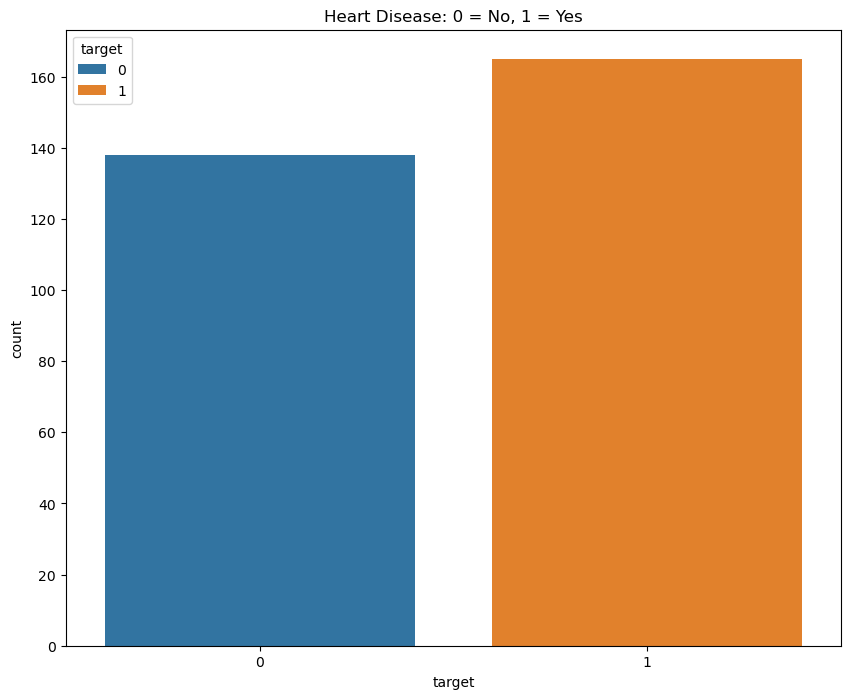

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))  # Set the figure size
sns.countplot(x='target', data=df, hue='target')
plt.title('Heart Disease: 0 = No, 1 = Yes')
plt.show()


In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

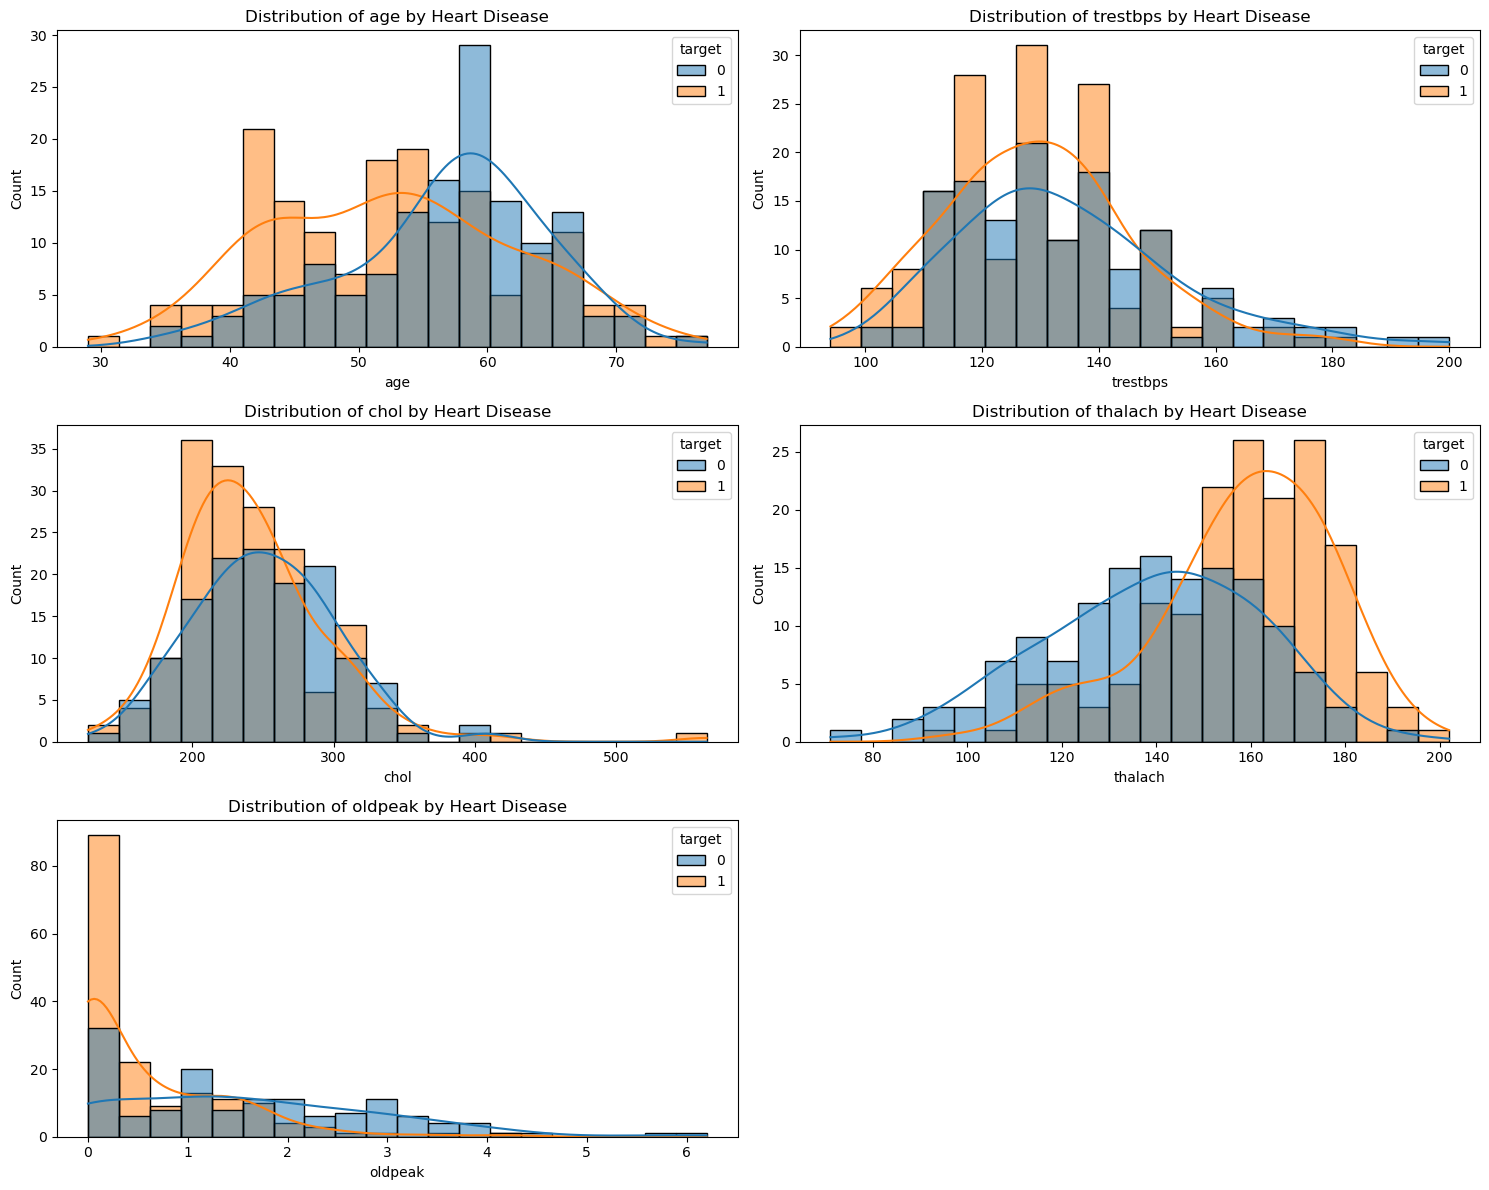

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i + 1)
    sns.histplot(data=df, x=col, bins=20, hue='target', kde=True)
    plt.title(f'Distribution of {col} by Heart Disease')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


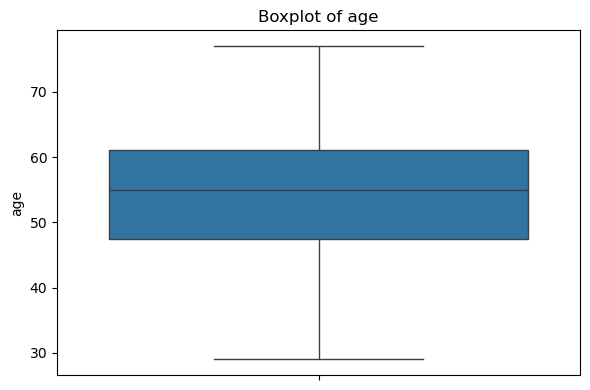

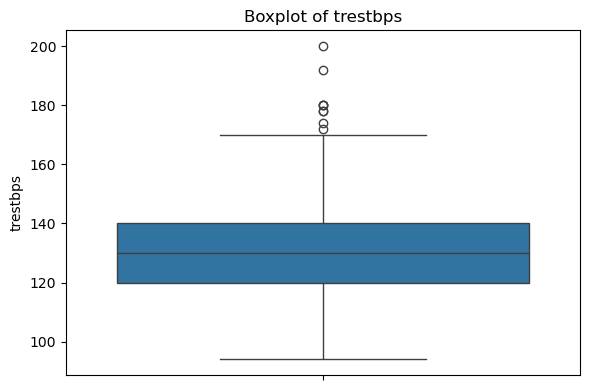

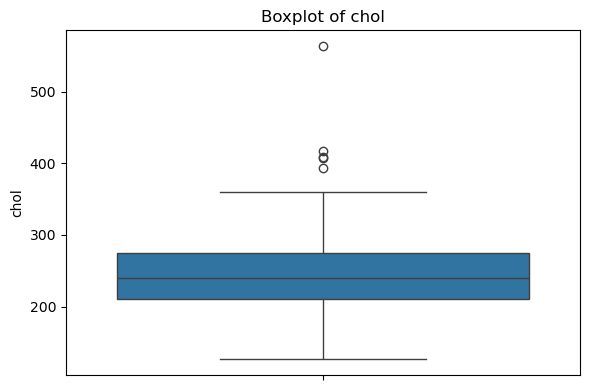

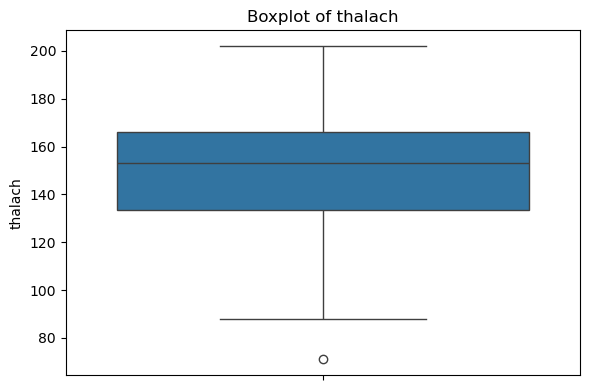

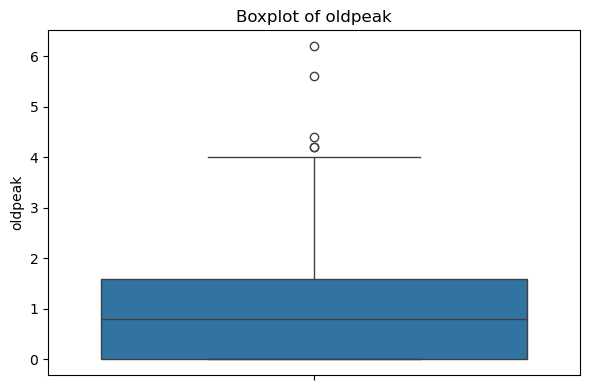

In [22]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


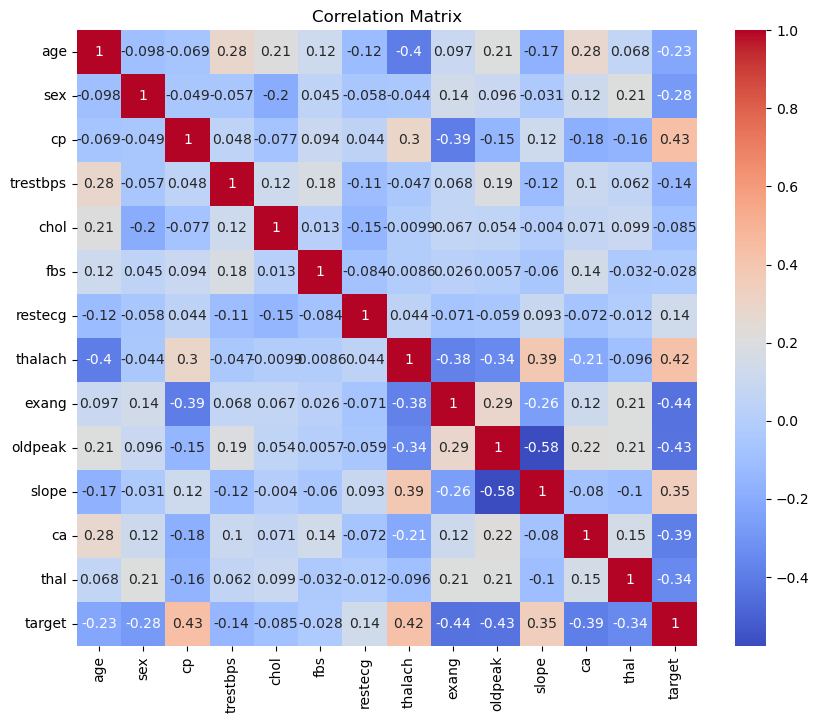

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


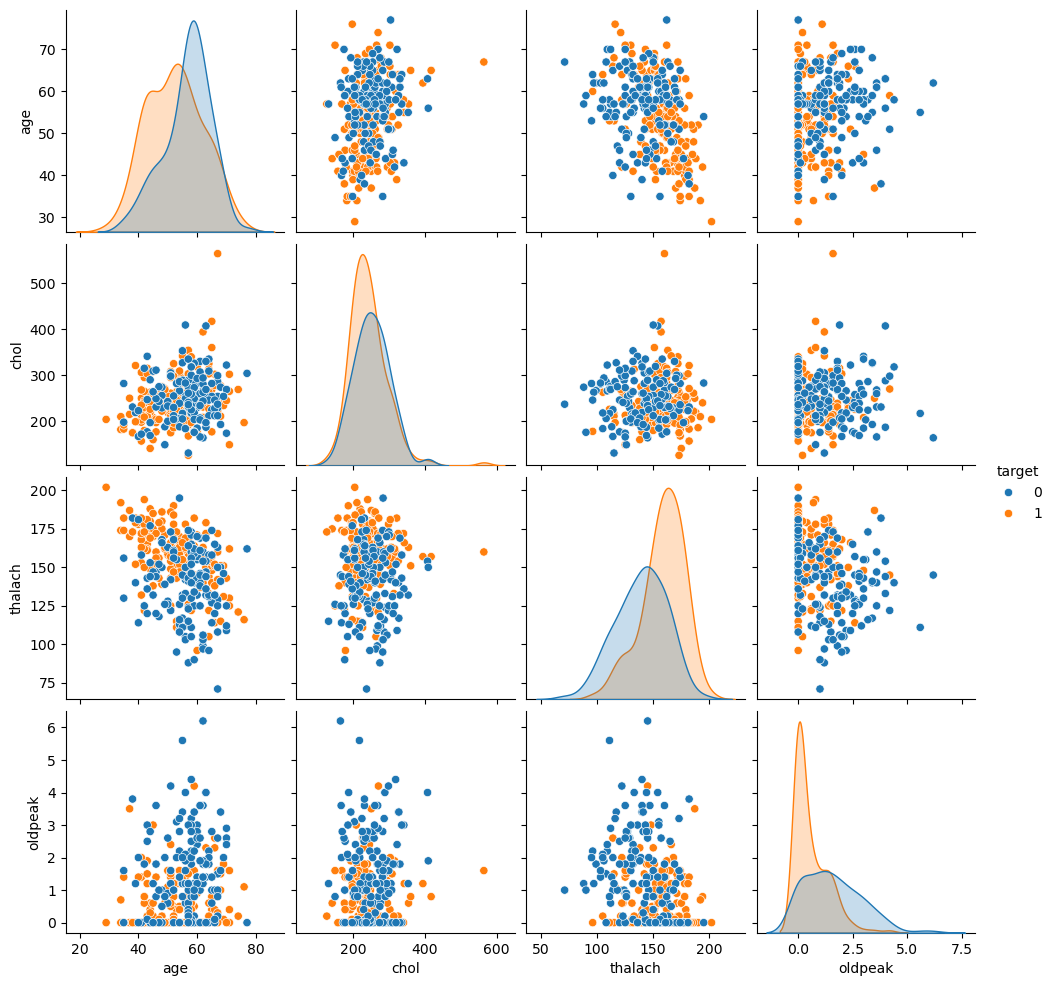

In [27]:
sns.pairplot(df[['age', 'chol', 'thalach', 'oldpeak', 'target']], hue='target')
plt.show()

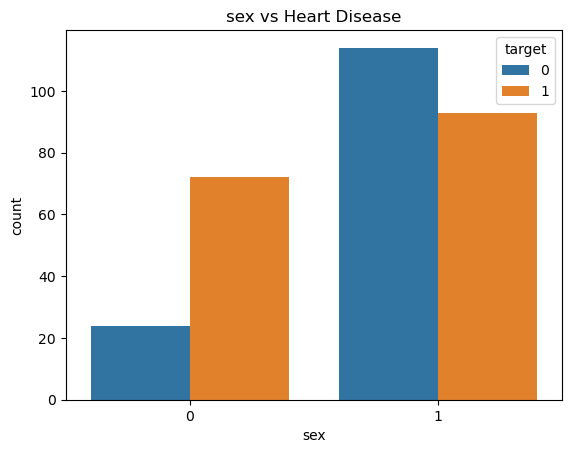

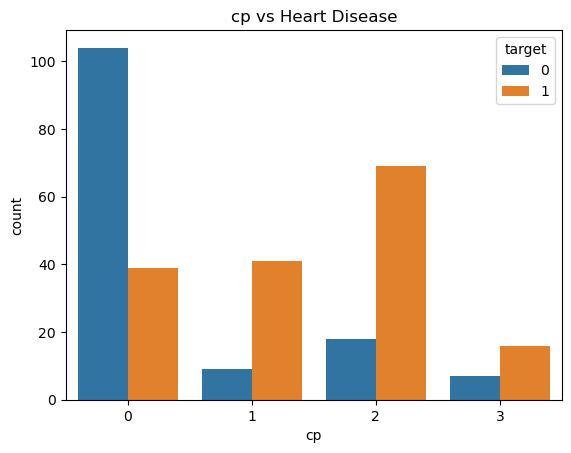

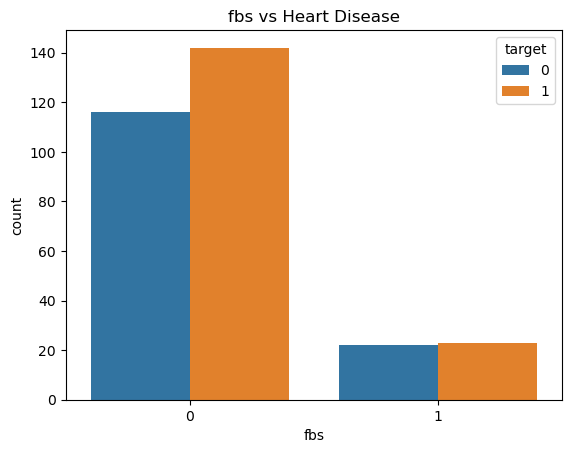

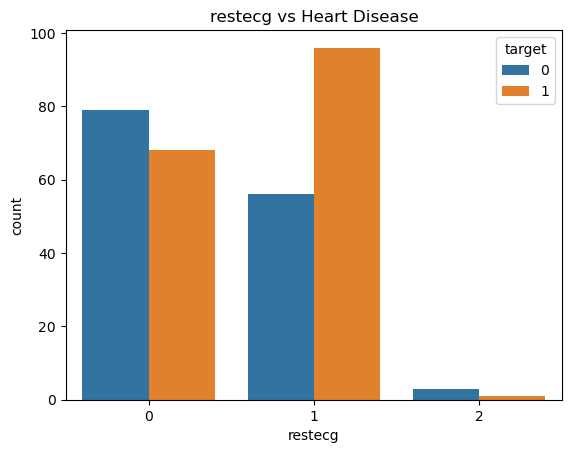

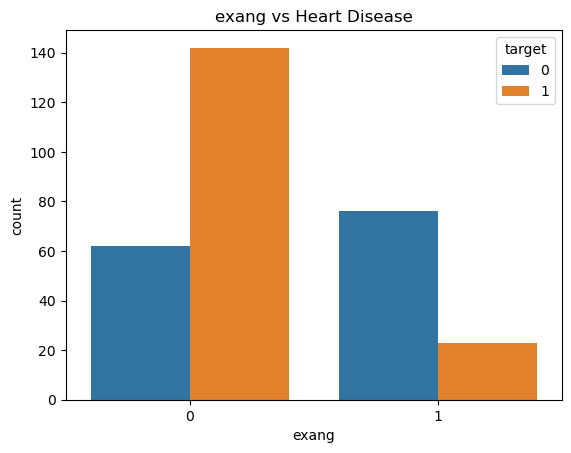

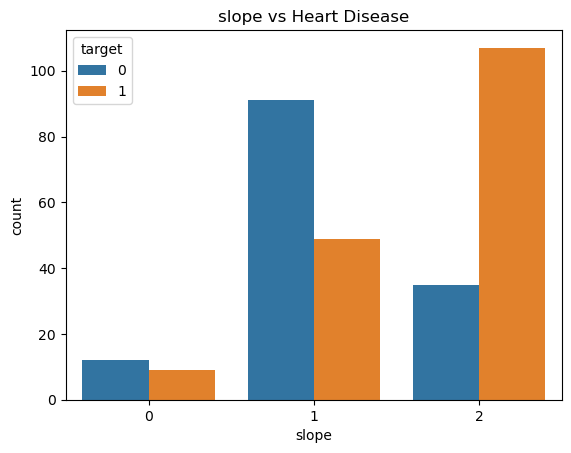

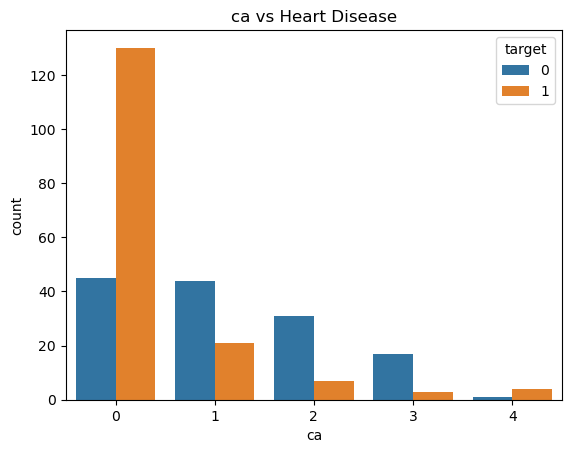

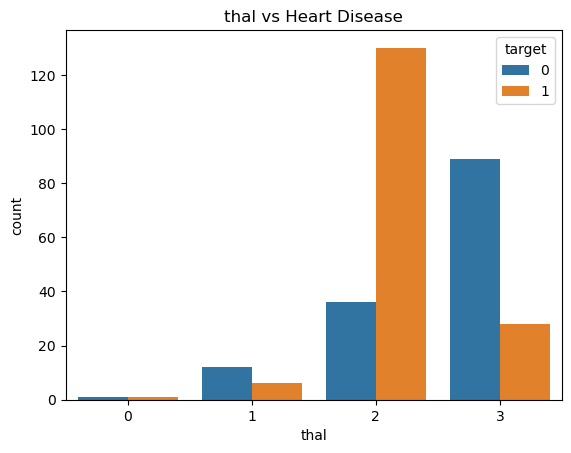

In [28]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in cat_cols:
    sns.countplot(x=col, hue='target', data=df)
    plt.title(f'{col} vs Heart Disease')
    plt.show()


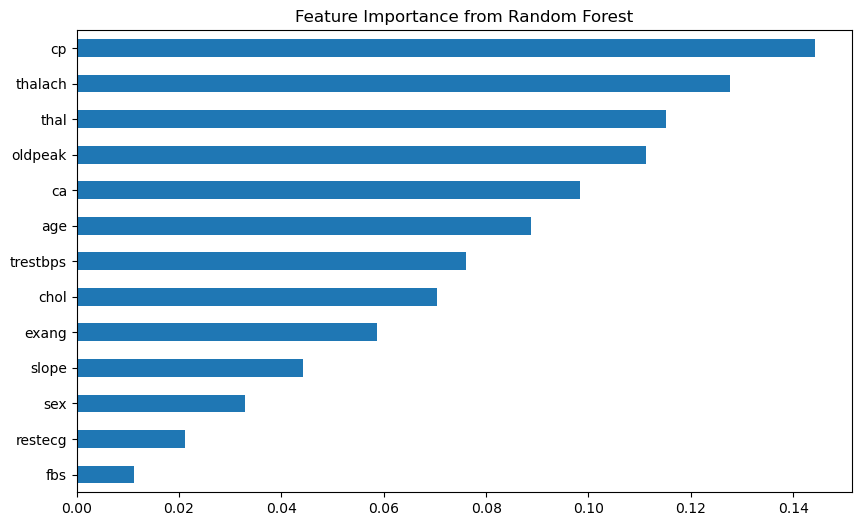

In [29]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('target', axis=1)
y = df['target']

model = RandomForestClassifier()
model.fit(X, y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance from Random Forest")
plt.show()


Text(0.5, 1.0, 'Age Distribution by Heart Disease Presence')

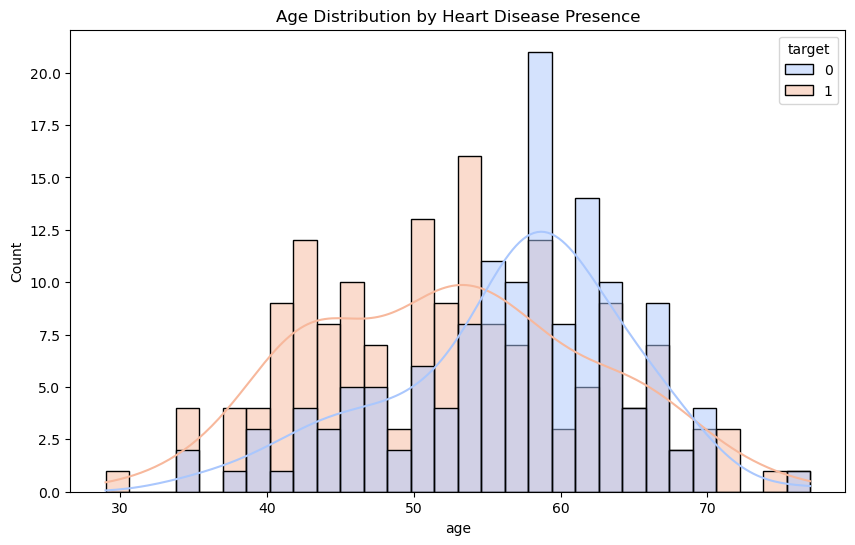

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', kde=True, bins=30, palette='coolwarm')
plt.title('Age Distribution by Heart Disease Presence')


Text(0.5, 1.0, 'Chest Pain Type vs Heart Disease')

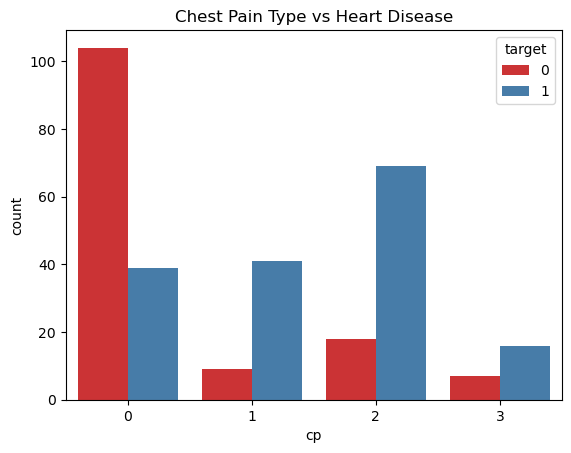

In [35]:
sns.countplot(x='cp', hue='target', data=df, palette='Set1')
plt.title('Chest Pain Type vs Heart Disease')


Text(0.5, 1.0, 'Max Heart Rate vs Heart Disease')

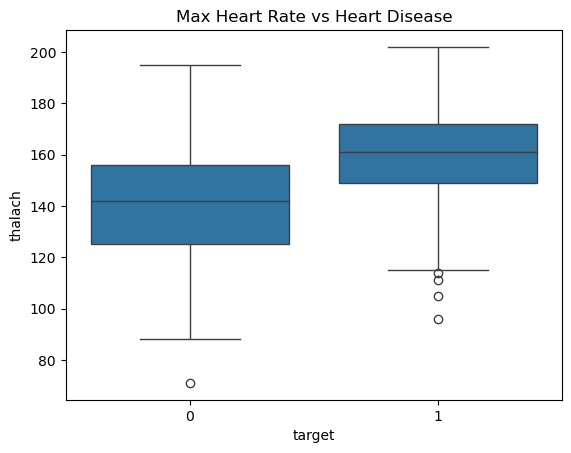

In [36]:
sns.boxplot(x='target', y='thalach', data=df)
plt.title('Max Heart Rate vs Heart Disease')


Text(0.5, 1.0, 'ST Depression by Target')

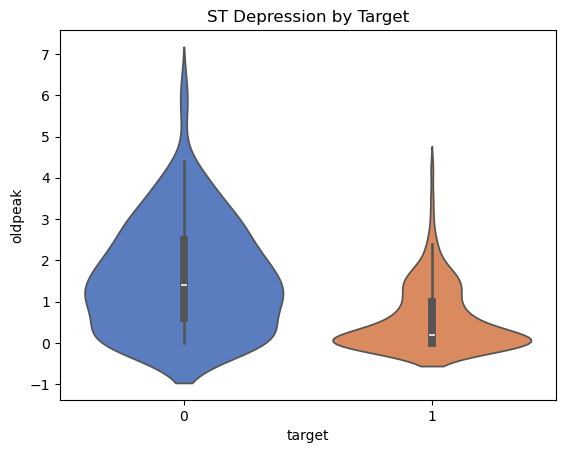

In [37]:
sns.violinplot(x='target', y='oldpeak', data=df, palette='muted')
plt.title('ST Depression by Target')


Text(0.5, 1.0, 'Slope vs Heart Disease')

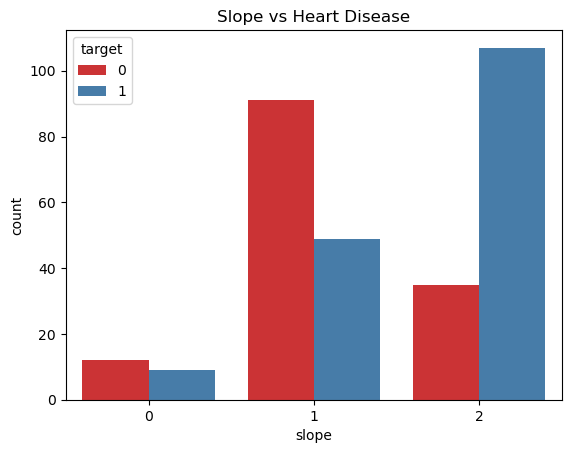

In [38]:
sns.countplot(x='slope', hue='target', data=df, palette='Set1')
plt.title('Slope vs Heart Disease')


Text(0.5, 1.0, 'Cholesterol vs Max Heart Rate by Target')

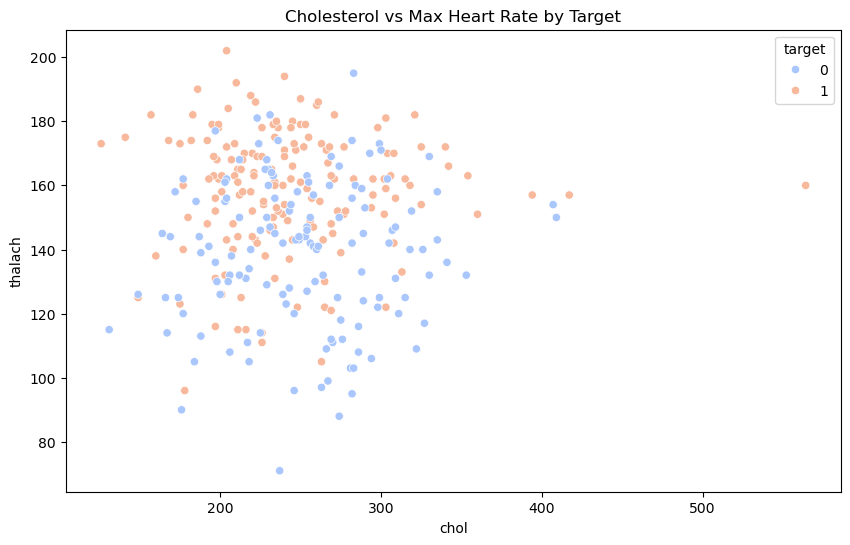

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='chol', y='thalach', hue='target', palette='coolwarm')
plt.title('Cholesterol vs Max Heart Rate by Target')


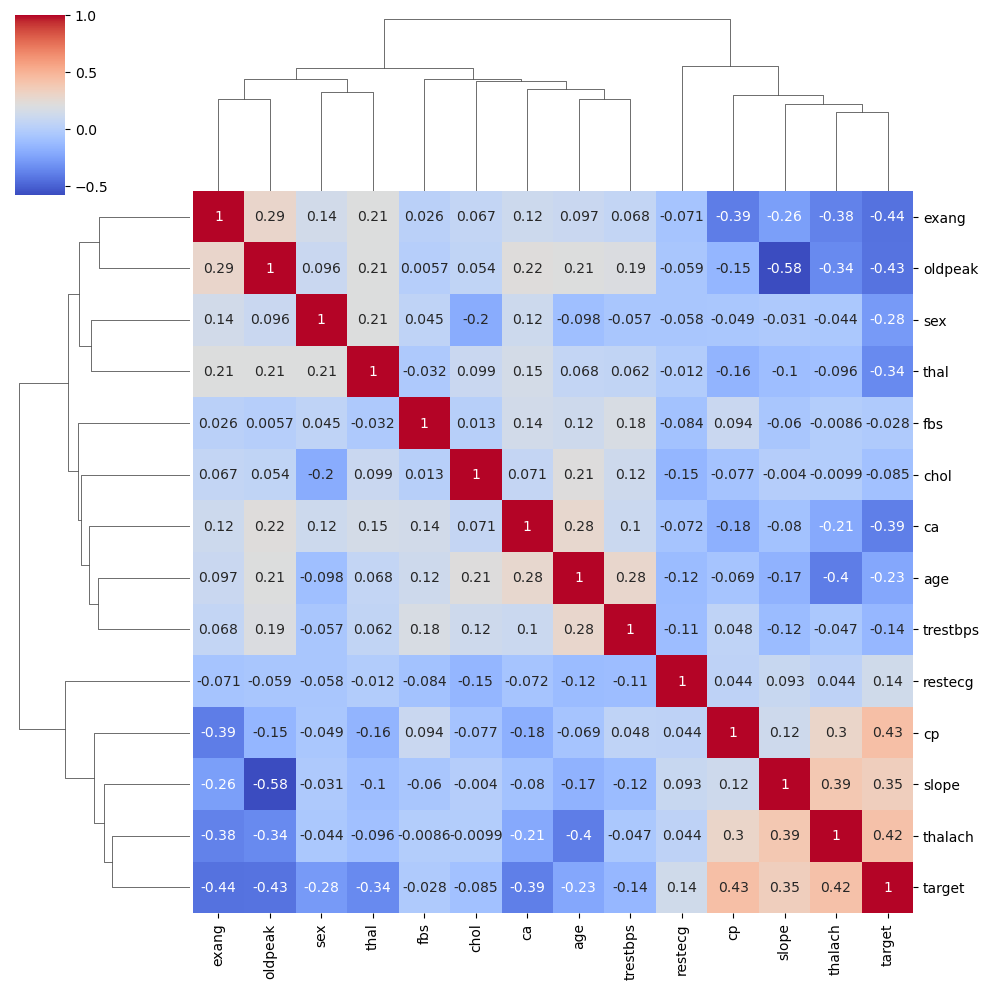

In [41]:
sns.clustermap(df.corr(), cmap='coolwarm', annot=True, figsize=(10, 10))
plt.show()

Text(0.5, 1.0, 'Thalassemia vs Heart Disease')

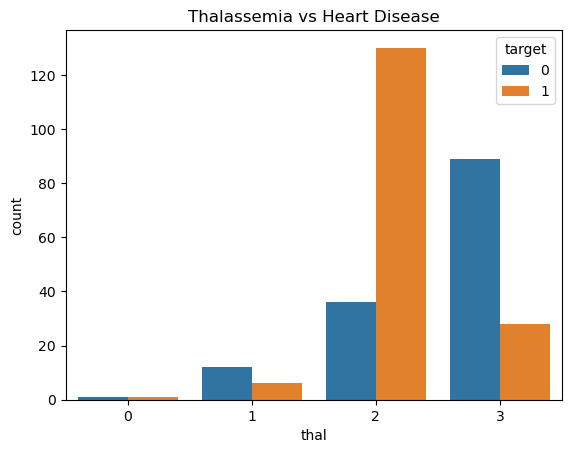

In [42]:
sns.countplot(x='thal', hue='target', data=df)
plt.title('Thalassemia vs Heart Disease')
